In [102]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df1=pd.read_csv('bengaluru_house_prices.csv')
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [6]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3 = df3.copy()
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
df3.head()

location       size total_sqft  bath   price  BHK
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [12]:
df3['BHK'].unique()
df3[df3.BHK>20]

location        size total_sqft  bath  price  BHK
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

location       size      total_sqft  bath    price  BHK
30                Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122                  Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137      8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165                Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188                KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410                 Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549             Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648                 Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661               Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672            Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4
772   Banashankari Stage VI      2 BHK     1160 - 1195   2.0   59.935    2
775            Basavanagara      1 BHK   1000Sq. Meter   2.0   93.000    1
850       Bannerghatta Road      2 BHK     1115 - 1130   2.0   58.935    2
872       Singapura Village      2 BHK   1100Sq. Yards   2.0   45.000    2
886              Chandapura      1 BHK       520 - 645   1.0   15.135    1
927             Thanisandra      2 BHK     1000 - 1285   2.0   43.415    2
959             Kammasandra      1 BHK       650 - 665   1.0   18.410    1
990                Sarjapur      1 BHK       633 - 666   1.0   17.535    1
1019         Marathi Layout  1 Bedroom       5.31Acres   1.0  110.000    1
1086             Narasapura  2 Bedroom         30Acres   2.0   29.500    2

In [16]:
df3=df3.drop(['size'],axis='columns')

In [17]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(20)

location  total_sqft  bath   price  BHK
0   Electronic City Phase II      1056.0   2.0   39.07    2
1           Chikka Tirupathi      2600.0   5.0  120.00    4
2                Uttarahalli      1440.0   2.0   62.00    3
3         Lingadheeranahalli      1521.0   3.0   95.00    3
4                   Kothanur      1200.0   2.0   51.00    2
5                 Whitefield      1170.0   2.0   38.00    2
6           Old Airport Road      2732.0   4.0  204.00    4
7               Rajaji Nagar      3300.0   4.0  600.00    4
8               Marathahalli      1310.0   3.0   63.25    3
9               Gandhi Bazar      1020.0   6.0  370.00    6
10                Whitefield      1800.0   2.0   70.00    3
11                Whitefield      2785.0   5.0  295.00    4
12        7th Phase JP Nagar      1000.0   2.0   38.00    2
13                 Gottigere      1100.0   2.0   40.00    2
14                  Sarjapur      2250.0   3.0  148.00    3
15               Mysore Road      1175.0   2.0   73.50    2
16             Bisuvanahalli      1180.0   3.0   48.00    3
17     Raja Rajeshwari Nagar      1540.0   3.0   60.00    3
18     Ramakrishnappa Layout      2770.0   4.0  290.00    3
19        Manayata Tech Park      1100.0   2.0   48.00    2

In [19]:
df4.loc[775]

location      Basavanagara
total_sqft             NaN
bath                   2.0
price                 93.0
BHK                      1
Name: 775, dtype: object

In [20]:
df5=df4.copy()

In [21]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

location  total_sqft  bath   price  BHK  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

In [22]:
df5.location.unique()
len(df5.location.unique())

1304

In [23]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1052

In [25]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [27]:
df5.head(20)

location  total_sqft  bath   price  BHK  price_per_sqft
0   Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1           Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2                Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3         Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                   Kothanur      1200.0   2.0   51.00    2     4250.000000
5                 Whitefield      1170.0   2.0   38.00    2     3247.863248
6           Old Airport Road      2732.0   4.0  204.00    4     7467.057101
7               Rajaji Nagar      3300.0   4.0  600.00    4    18181.818182
8               Marathahalli      1310.0   3.0   63.25    3     4828.244275
9                      other      1020.0   6.0  370.00    6    36274.509804
10                Whitefield      1800.0   2.0   70.00    3     3888.888889
11                Whitefield      2785.0   5.0  295.00    4    10592.459605
12        7th Phase JP Nagar      1000.0   2.0   38.00    2     3800.000000
13                 Gottigere      1100.0   2.0   40.00    2     3636.363636
14                  Sarjapur      2250.0   3.0  148.00    3     6577.777778
15               Mysore Road      1175.0   2.0   73.50    2     6255.319149
16             Bisuvanahalli      1180.0   3.0   48.00    3     4067.796610
17     Raja Rajeshwari Nagar      1540.0   3.0   60.00    3     3896.103896
18                     other      2770.0   4.0  290.00    3    10469.314079
19                     other      1100.0   2.0   48.00    2     4363.636364

In [28]:
df5[df5.total_sqft/df5.BHK<300].head()

location  total_sqft  bath  price  BHK  price_per_sqft
9                 other      1020.0   6.0  370.0    6    36274.509804
45           HSR Layout       600.0   9.0  200.0    8    33333.333333
58        Murugeshpalya      1407.0   4.0  150.0    6    10660.980810
68  Devarachikkanahalli      1350.0   7.0   85.0    8     6296.296296
70                other       500.0   3.0  100.0    3    20000.000000

In [29]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(12502, 6)

In [30]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [32]:
df7=remove_pps_outliers(df6)
df7.head()

location  total_sqft  bath  price  BHK  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668

**removing 2BHK apartments whose price_per_sqft is less than the mean price_per_sqft of 1 BHK apartment in same location**

In [34]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0],}
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [35]:
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 6)

In [36]:
df8[df8.bath>10]

location  total_sqft  bath  price  BHK  price_per_sqft
5277  Neeladri Nagar      4000.0  12.0  160.0   10     4000.000000
8486           other     12000.0  12.0  525.0   10     4375.000000
8575           other     10000.0  16.0  550.0   16     5500.000000
9308           other      6000.0  12.0  150.0   11     2500.000000
9639           other      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'count')

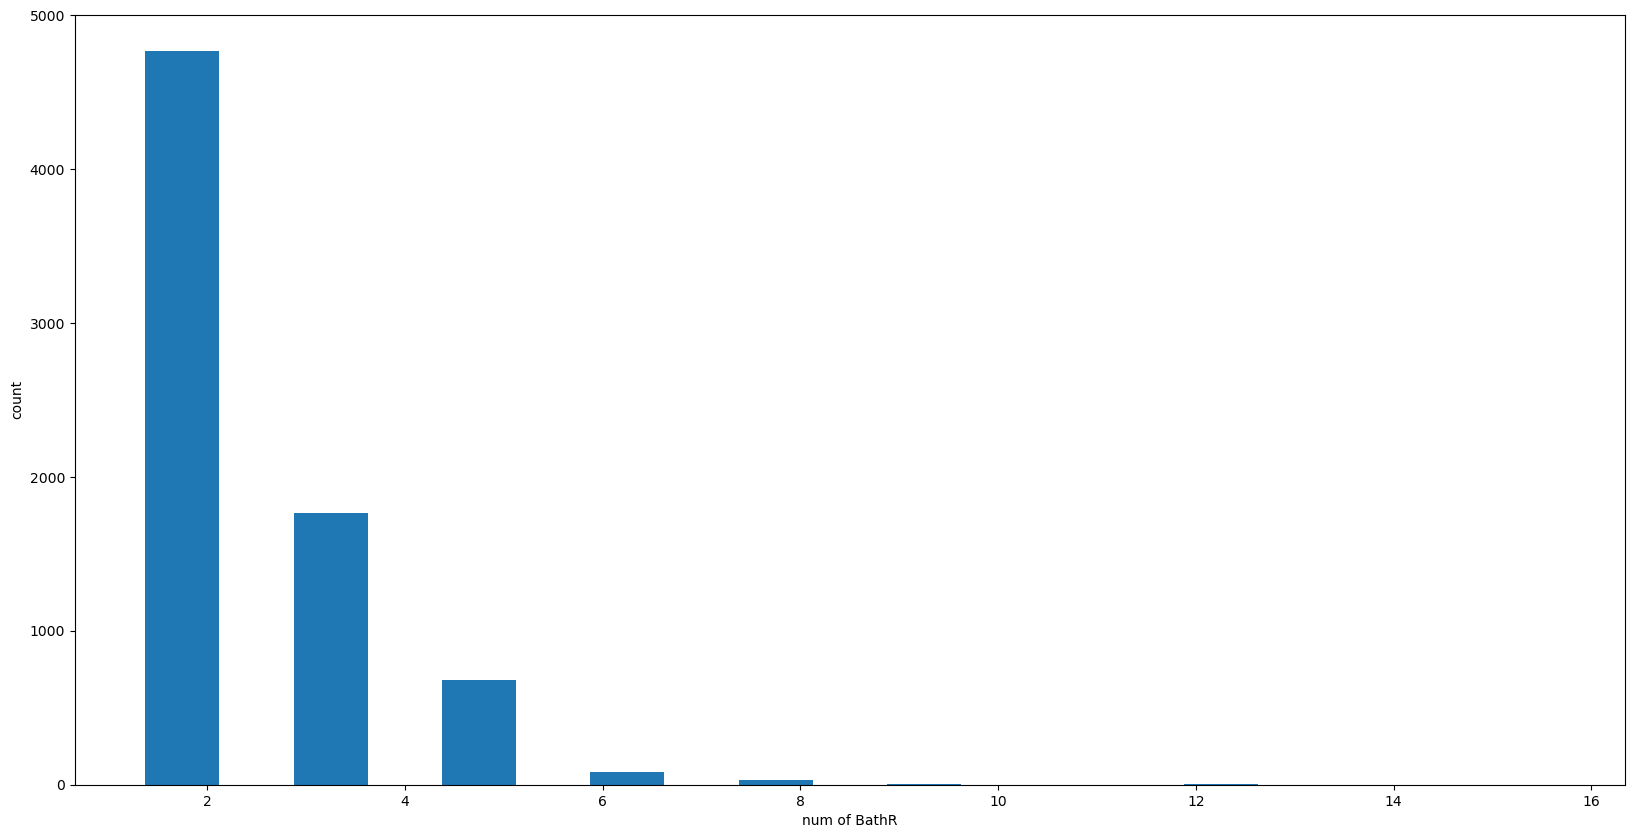

In [37]:
plt.hist(df8.bath,rwidth=0.5)
plt.xlabel('num of BathR')
plt.ylabel('count')

**removing records which says no of bathrooms are greater than the no of bedrooms**

In [39]:
df8[df8.bath>df8.BHK+2]

location  total_sqft  bath   price  BHK  price_per_sqft
1626  Chikkabanavar      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      1806.0   6.0   116.0    3     6423.034330
8411          other     11338.0   9.0  1000.0    6     8819.897689

In [40]:
df9=df8[df8.bath<df8.BHK+2]

In [149]:
df9.head()

location  total_sqft  bath  price  BHK  price_per_sqft
0  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668

In [42]:
df10=df9.drop(['price_per_sqft'],axis='columns')

##### Label Encoding

In [132]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'location' column
df10['location_encoded'] = label_encoder.fit_transform(df10['location'])


#### to make it easy to provide output for predicted values

In [43]:
pd.get_dummies(df10.location)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                     True               False                      False   
1                     True               False                      False   
2                     True               False                      False   
3                     True               False                      False   
4                     True               False                      False   
...                    ...                 ...                        ...   
10232                False               False                      False   
10233                False               False                      False   
10236                False               False                      False   
10237                False               False                      False   
10240                False               False                      False   

       2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     False                 False               False   
1                     False                 False               False   
2                     False                 False               False   
3                     False                 False               False   
4                     False                 False               False   
...                     ...                   ...                 ...   
10232                 False                 False               False   
10233                 False                 False               False   
10236                 False                 False               False   
10237                 False                 False               False   
10240                 False                 False               False   

       6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   False               False               False   
1                   False               False               False   
2                   False               False               False   
3                   False               False               False   
4                   False               False               False   
...                   ...                 ...                 ...   
10232               False               False               False   
10233               False               False               False   
10236               False               False               False   
10237               False               False               False   
10240               False               False               False   

       9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   False  ...                 False               False   
1                   False  ...                 False               False   
2                   False  ...                 False               False   
3                   False  ...                 False               False   
4                   False  ...                 False               False   
...                   ...  ...                   ...                 ...   
10232               False  ...                 False               False   
10233               False  ...                 False               False   
10236               False  ...                 False               False   
10237               False  ...                 False               False   
10240               False  ...                 False               False   

       Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            False       False           False      False               False   
1            False       False           False      False               False   
2            False       False           False      False               False   
3            False       False           False      False               False   
4            False       False           False      False 

In [44]:
dummies=pd.get_dummies(df10.location)

In [45]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 10240
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7251 non-null   object 
 1   total_sqft  7251 non-null   float64
 2   bath        7251 non-null   float64
 3   price       7251 non-null   float64
 4   BHK         7251 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 339.9+ KB


In [46]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [47]:
df11.head()

location  total_sqft  bath  price  BHK  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                 True   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                 True   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                 True   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                 True   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                 True   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0               False                      False                 False   
1               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   
4               False                      False                 False   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                 False  ...        False                 False   
1                 False  ...        False                 False   
2                 False  ...        False                 False   
3                 False  ...        False                 False   
4                 False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 246 columns]

In [48]:
df12=df11.drop('location',axis='columns')
df12.head()

total_sqft  bath  price  BHK  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                 True               False   
1      1630.0   3.0  194.0    3                 True               False   
2      1875.0   2.0  235.0    3                 True               False   
3      1200.0   2.0  130.0    3                 True               False   
4      1235.0   2.0  148.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0               False  ...        False                 False   
1               False  ...        False                 False   
2               False  ...        False                 False   
3               False  ...        False                 False   
4               False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 245 columns]

In [134]:
df12=df10.drop('location',axis='columns')
df12.head()

total_sqft  bath  price  BHK  location_encoded
0      2850.0   4.0  428.0    4                 0
1      1630.0   3.0  194.0    3                 0
2      1875.0   2.0  235.0    3                 0
3      1200.0   2.0  130.0    3                 0
4      1235.0   2.0  148.0    2                 0

In [49]:
df12.shape

(7251, 245)

In [136]:
X=df12.drop('price',axis='columns')
X.head()

total_sqft  bath  BHK  location_encoded
0      2850.0   4.0    4                 0
1      1630.0   3.0    3                 0
2      1875.0   2.0    3                 0
3      1200.0   2.0    3                 0
4      1235.0   2.0    2                 0

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 10240
Columns: 244 entries, total_sqft to Yeshwanthpur
dtypes: bool(241), float64(2), int64(1)
memory usage: 1.9 MB


In [138]:
y=df12.price

In [114]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [142]:
from sklearn.preprocessing import StandardScaler
# Scale the features to have mean 0 and variance 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])


C:\Users\MadaraMendis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [148]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 15311.1025 - mae: 92.2249 - val_loss: 6728.5127 - val_mae: 44.6605
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4282.0107 - mae: 34.2894 - val_loss: 4031.8418 - val_mae: 30.8427
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3401.4412 - mae: 29.1034 - val_loss: 3362.8667 - val_mae: 28.3675
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2632.3604 - mae: 26.9529 - val_loss: 2906.4150 - val_mae: 26.5868
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2440.3628 - mae: 25.3728 - val_loss: 2672.2341 - val_mae: 24.4958
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2036.3082 - mae: 24.1455 - val_loss: 2541.9880 - val_mae: 24.5740
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2495.9436 - mae: 24.5841 - val_loss: 2483.1738 - val_mae: 23.5618
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2269.7847 - mae: 23.5072 - val_loss: 2439.9792 - 

In [153]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae}')


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1567.5619 - mae: 21.0513
Test MAE: 20.69879150390625


In [128]:
from sklearn.metrics import r2_score


In [155]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared score on test data: {r2}')


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R-squared score on test data: 0.7303483101465438


In [157]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7211140040108668

In [115]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

**finding the best model**

In [109]:
from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [65]:
def find_best_model_using_gridsearchcv(X,y):
    algos={
        'lr':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'dt':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv ,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_,
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


def find_best_model_using_gridsearchcv(X,y):
    algos={
        'svr': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly'],  # Types of kernels
            'C': [0.1, 1, 10],  # Regularization parameter
            'gamma': ['scale', 'auto'],  # Kernel coefficient
            'epsilon': [0.1, 0.2, 0.5]  # Epsilon in the epsilon-SVR model
                }
            },
       'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],  # Number of trees in the forest
            'criterion': ['squared_error', 'absolute_error'],  # Function to measure the quality of a split
            'max_depth': [None, 10, 20],  # Maximum depth of the tree
            'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
            'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
                }
            },
        'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10],  # Regularization strength
            'fit_intercept': [True, False],  # Whether to fit the intercept term or not
            'solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Solver to use in the computational routines
            }
        }
    }

    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv ,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_,
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [66]:
find_best_model_using_gridsearchcv(X,y)

model  best_score                                        best_params
0     lr    0.819001           {'copy_X': True, 'fit_intercept': False}
1  lasso    0.687442                {'alpha': 2, 'selection': 'random'}
2     dt    0.717988  {'criterion': 'squared_error', 'splitter': 'be...

In [72]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [73]:
predict_price('1st Block Jayanagar',1000,2,2)

C:\Users\MadaraMendis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


201.9919790679242

In [74]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\MadaraMendis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677191724